<a href="https://colab.research.google.com/github/Abdul-Wahab-318/News-Topic-Classification/blob/main/NLP_Project_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report , confusion_matrix , precision_score , recall_score , f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load Data

In [ ]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


# Text cleaning

In [ ]:
x_train = train.copy()
y_train = x_train['Class Index']

x_train['content'] = x_train['Title'] + " " + x_train['Description']
x_train.drop(columns=['Title' , 'Description' , 'Class Index'] , inplace=True)

x_train.head()

,content
0,Wall St. Bears Claw Back Into the Black (Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Iraq Halts Oil Exports from Main Southern Pipe...
4,"Oil prices soar to all-time record, posing new..."


In [ ]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z$]', ' ', text)

    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove extra words
    extra_words = {'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
                   'reuter', 'reuters', 'week', 'new', 'say', 'said', 'saying', 'ap' , 'afp', 'gt', 'lt',
                   'st', 'quot'}
    tokens = [token for token in tokens if token not in extra_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

In [ ]:
x_train_cleaned = x_train.map(lambda content : preprocess_text(content))

In [ ]:
corpus = x_train_cleaned.content.values
corpus

array(['wall bear claw back black short seller wall street dwindling band ultra cynic seeing green',
       'carlyle look toward commercial aerospace private investment firm carlyle group reputation making well timed occasionally controversial play defense industry quietly placed bet another part market',
       'oil economy cloud stock outlook soaring crude price plus worry economy outlook earnings expected hang stock market next depth summer doldrums',
       ...,
       'saban going dolphin yet miami dolphin put courtship lsu coach nick saban hold comply nfl hiring policy interviewing least one minority candidate team source told associated press last night',
       'today nfl game pittsburgh ny giant time p line steelers record steelers giant v spread steelers giant series giant lead comment think giant knew ben roethlisberger available draft day broke bank traded eli manning big ben done year complete',
       'net get carter raptor indianapolis star vince carter traded toronto ra

# Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(max_features=700 , ngram_range=(1,3), lowercase=False)
x_train_transformed = countvectorizer.fit_transform(corpus)


<ipython-input-68-8e3202e41ef1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_words, x='frequency', y='word', palette='viridis')


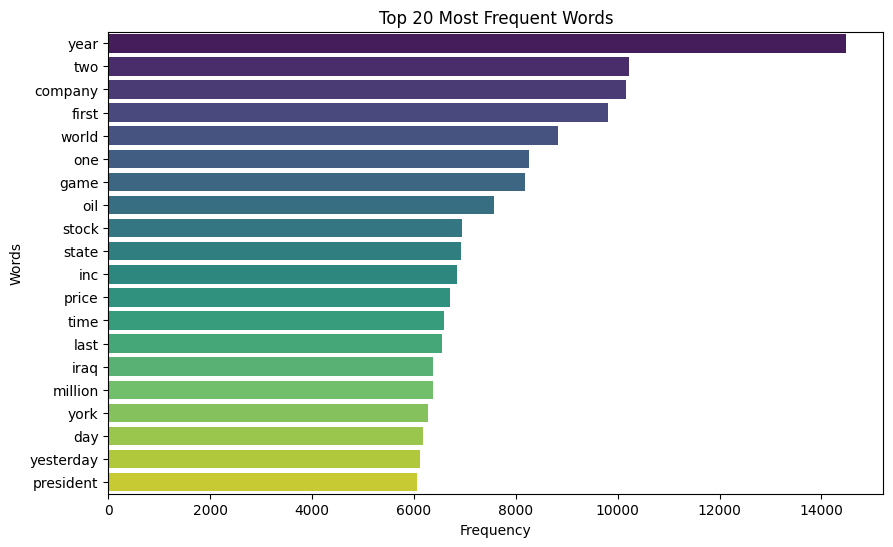

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract feature names and their frequencies
word_frequencies = x_train_transformed.toarray().sum(axis=0)  # Sum the counts across all documents
feature_names = countvectorizer.get_feature_names_out()       # Get feature names (words)

# Step 2: Create a DataFrame for easy manipulation
freq_df = pd.DataFrame({'word': feature_names, 'frequency': word_frequencies})

# Step 3: Sort by frequency and select top 20 words
top_20_words = freq_df.sort_values(by='frequency', ascending=False).head(20)

# Step 4: Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_words, x='frequency', y='word', palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [ ]:
def display_frequency(label=1):

  x_filtered = x_train_transformed[y_train==label]
  word_frequencies = x_filtered.toarray().sum(axis=0)
  feature_names = countvectorizer.get_feature_names_out()

  # Step 2: Create a DataFrame for easy manipulation
  freq_df = pd.DataFrame({'word': feature_names, 'frequency': word_frequencies})

  # Step 3: Sort by frequency and select top 20 words
  top_20_words = freq_df.sort_values(by='frequency', ascending=False).head(20)

  # Step 4: Create a bar chart
  plt.figure(figsize=(10, 6))
  sns.barplot(data=top_20_words, x='frequency', y='word', palette='viridis')
  plt.title('Top 20 Most Frequent Words')
  plt.xlabel('Frequency')
  plt.ylabel('Words')
  plt.show()


# Most frequent words in world news

<ipython-input-69-c9f36b6675fb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_words, x='frequency', y='word', palette='viridis')


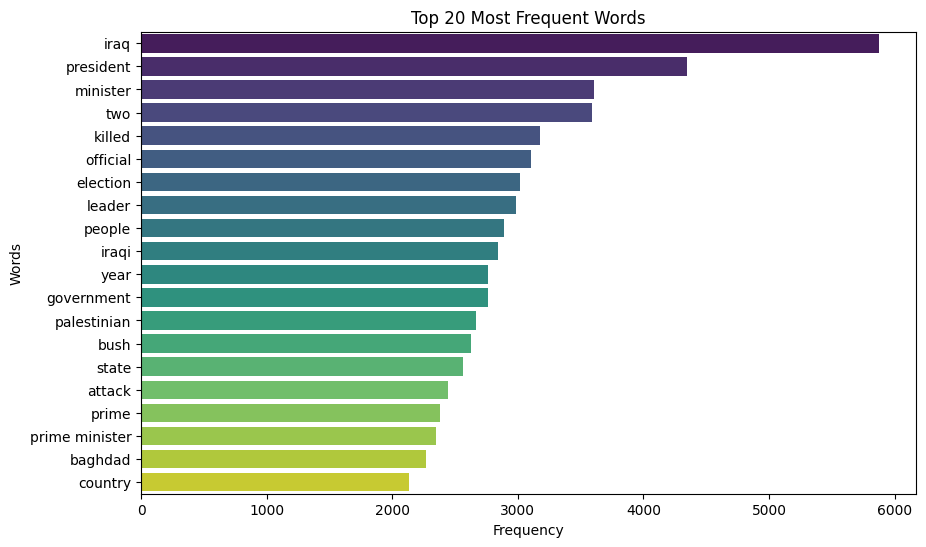

In [ ]:
display_frequency(1)

# Most frequent words in Sports news

<ipython-input-69-c9f36b6675fb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_words, x='frequency', y='word', palette='viridis')


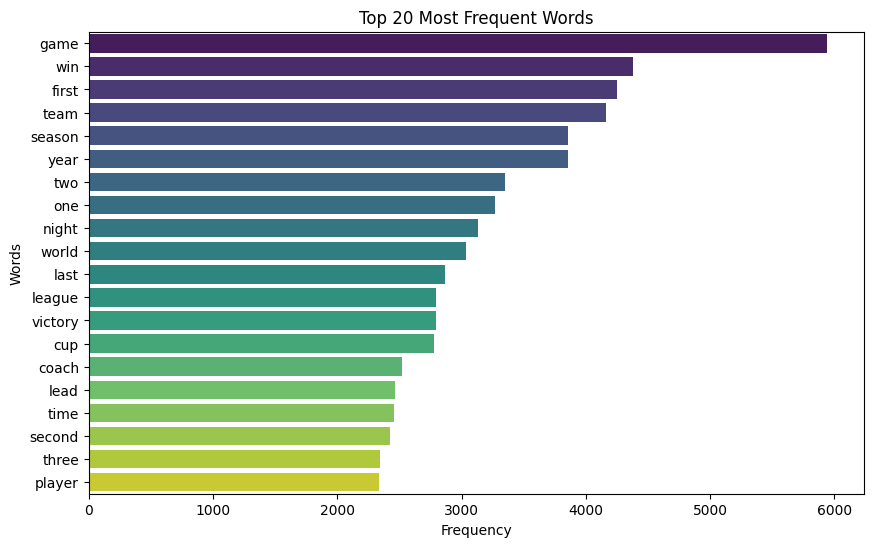

In [ ]:
display_frequency(2)

# Most frequent words in Business news

<ipython-input-69-c9f36b6675fb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_words, x='frequency', y='word', palette='viridis')


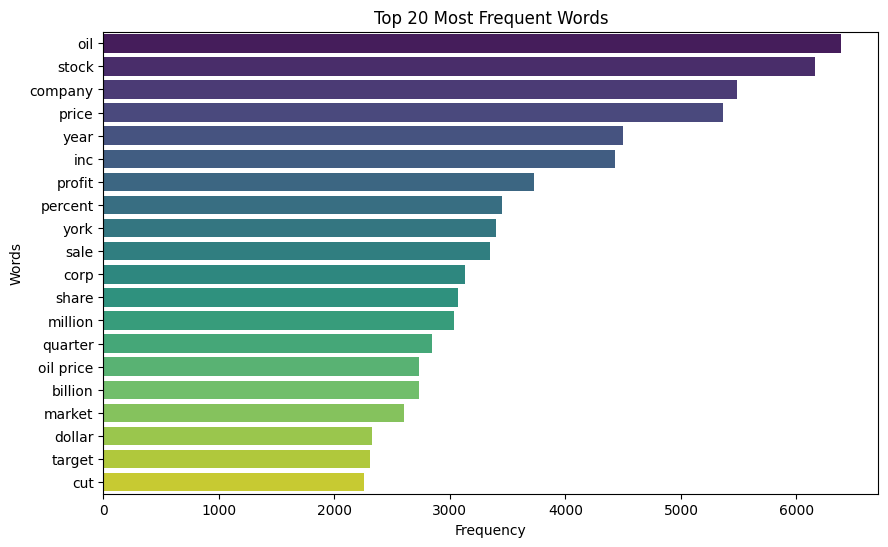

In [ ]:
display_frequency(3)

# Most frequent words in Tech news

<ipython-input-69-c9f36b6675fb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_words, x='frequency', y='word', palette='viridis')


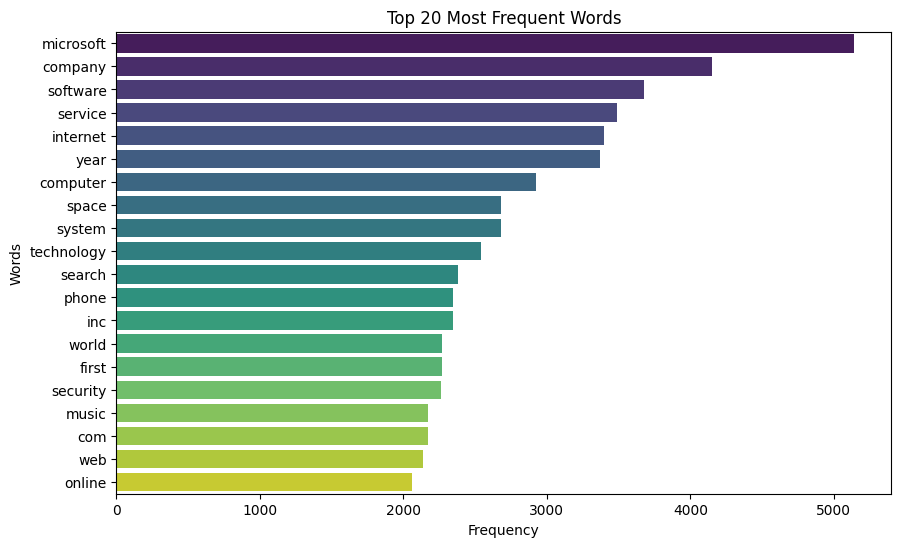

In [ ]:
display_frequency(4)

# Model Building

In [ ]:
tfidf = TfidfVectorizer(max_features=900 , ngram_range=(1,3) , min_df=8)
pipeline = Pipeline([
    ('tfidf' , tfidf)
])

x_train_vectorized = pipeline.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

lgr = LogisticRegression(n_jobs=-1)
# cv = cross_val_score(lgr , x_train_vectorized , y_train.values , cv=4 , scoring='f1_weighted')
# print('--- Average F1-Score for Logistic Regression model: {} ---'.format(round(cv.mean(), 3)))

In [ ]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'solver' : [ 'lbfgs' , 'newton-cg' , 'saga' ],
#     'max_iter' : [100,120,140]
# }

param_grid = {
    'solver' : [ 'saga' ],
    'max_iter' : [120]
}

grid_search = GridSearchCV(lgr, param_grid = param_grid, cv=3, scoring="f1_weighted", return_train_score=True, n_jobs=-1)
grid_search.fit(x_train_vectorized , y_train.values)


GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'max_iter': [120], 'solver': ['saga']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
print(grid_search.best_params_ , " : " , grid_search.best_score_ )

{'max_iter': 120, 'solver': 'saga'}  :  0.8568714126560781


In [ ]:
model = grid_search.best_estimator_

In [ ]:
x_test = pd.DataFrame( test['Title'] + " : " + test['Description'] , columns=['content'] )
x_test = x_test.content.apply(lambda content : preprocess_text(content))
y_test = test['Class Index']

In [ ]:
pipeline = Pipeline([
    ('tfidf' , tfidf),
    ('model' , model)
])

y_test_pred = pipeline.predict(x_test)
y_test_pred

array([3, 4, 4, ..., 2, 4, 4])

In [ ]:
test_precision = precision_score(y_test_pred , y_test , average="weighted")
test_recall = recall_score(y_test_pred , y_test , average="weighted")
test_f1 = f1_score(y_test_pred , y_test , average="weighted")

print("Precision : " , test_precision)
print("Recall : " , test_recall)
print("F1 : " , test_f1)

Precision :  0.8649020775623268
Recall :  0.8639473684210527
F1 :  0.8642940656938642


In [ ]:
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']
print(classification_report(y_test, y_test_pred, target_names=class_names))

              precision    recall  f1-score   support

       World       0.88      0.86      0.87      1900
      Sports       0.91      0.94      0.92      1900
    Business       0.83      0.82      0.82      1900
    Sci/Tech       0.84      0.84      0.84      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600



# Confusion Matrix

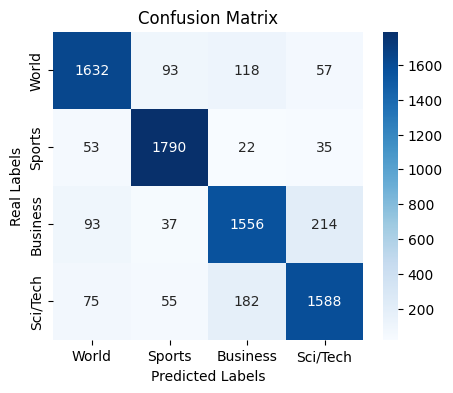

In [ ]:
# Calculate confusion matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot heatmap

plt.figure(figsize=(5, 4))

sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names , cmap="Blues")

plt.xlabel('Predicted Labels')

plt.ylabel('Real Labels')

plt.title('Confusion Matrix')

plt.show()